#### Задача 2:  аппроксимация функции

Рассмотрим сложную математическую функцию на отрезке [1, 15]:

f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

1) Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?


In [67]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [68]:
x = np.arange(1,16,0.1)

In [69]:
y = np.sin(x/5)* np.exp(x/10) + 5*np.exp(-x/2)

In [70]:
y

array([ 3.25221687,  3.12835399,  3.01206714,  2.90299951,  2.80081118,
        2.70517826,  2.6157921 ,  2.53235853,  2.45459713,  2.38224055,
        2.31503384,  2.25273387,  2.19510867,  2.14193694,  2.09300744,
        2.04811856,  2.00707777,  1.96970118,  1.93581311,  1.90524569,
        1.87783842,  1.8534378 ,  1.83189701,  1.81307554,  1.79683886,
        1.78305813,  1.77160989,  1.76237578,  1.75524231,  1.75010055,
        1.74684595,  1.74537806,  1.74560034,  1.74741997,  1.75074761,
        1.75549726,  1.76158605,  1.76893408,  1.77746429,  1.78710226,
        1.7977761 ,  1.80941632,  1.82195565,  1.83532898,  1.84947321,
        1.86432715,  1.8798314 ,  1.89592828,  1.91256169,  1.92967706,
        1.94722128,  1.96514256,  1.98339041,  2.00191553,  2.02066978,
        2.03960608,  2.05867839,  2.07784159,  2.09705151,  2.11626482,
        2.13543898,  2.15453224,  2.17350357,  2.19231261,  2.21091966,
        2.22928563,  2.24737201,  2.26514084,  2.28255469,  2.29

In [71]:
m = np.sin(1/5)* np.exp(1/10) + 5*np.exp(-1/2)

In [72]:
n = np.sin(15/5)* np.exp(15/10) + 5*np.exp(-15/2)

In [73]:
from scipy import linalg

In [74]:
a = np.array([[1, 1], [1, 15]])
b = np.array([m, n])
w = linalg.solve(a, b)
print(w)

[ 3.43914511 -0.18692825]


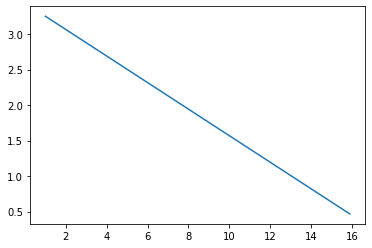

In [75]:
plt.plot(x, w[0]+w[1]*x)
plt.show()

Приближает очень плохо

2) Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?


In [58]:
k = np.sin(8/5)* np.exp(8/10) + 5*np.exp(-8/2)

In [85]:
a_1 = np.array([[1, 1,1], [1, 8, 64], [1, 15,225]])
b_1 = np.array([m, k, n])
w_1 = linalg.solve(a_1, b_1)
print(w_1)

[ 3.32512949 -0.06531159 -0.00760104]


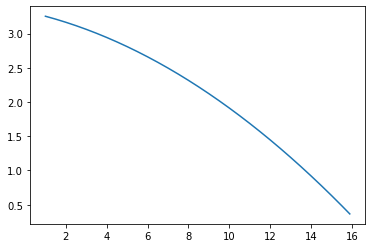

In [86]:
plt.plot(x, w_1[0]+w_1[1]*x+w_1[2]*x*x)
plt.show()

Качество немного улучшилось

3) Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)


In [87]:
l = np.sin(4/5)* np.exp(4/10) + 5*np.exp(-4/2)
h = np.sin(10/5)* np.exp(10/10) + 5*np.exp(-10/2)

In [88]:
a_2 = np.array([[1, 1, 1, 1], [1, 4, 16, 64],[1, 10, 100, 1000], [1, 15, 225, 3375]])
b_2 = np.array([m, l, h, n])
w_2 = linalg.solve(a_2, b_2)
print(w_2)

[ 4.36264154 -1.29552587  0.19333685 -0.00823565]


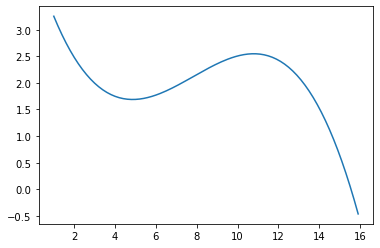

In [89]:
plt.plot(x, w_2[0]+w_2[1]*x+w_2[2]*x*x+w_2[3]*x*x*x)
plt.show()

4) Запишите полученные числа в файл, разделив пробелами. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-2.txt).





In [103]:
w =np.round(w_2,2)

In [108]:
a = str(w[0]) +' '+ str(w[1]) +' '+ str(w[2]) +' '+ str(w[3])


In [109]:
a

'4.36 -1.3 0.19 -0.01'

In [110]:
file = open('submission-2.txt', 'w')
file.write(a)
file.close()